### Group Details:
#### Group Name: Group 104
#### Group Members:
* Vijay Lakshmanan Iyer - s3797863
* Bijo B Thomas - s3758150

# <center>UFC Match Winner Prediction</center>  
## Objective
Objective of the project is to analyze the historical data of the ufc matches happened between 1993 till 2019 and build a prediction model to predict the winner of the ufc match given the statistics of the fighters in individual corner. These statistics are basically the statistics of all the matches the fighter had, in his/her career in the given period.
## Table of Contents:
* [Introduction](#Intro)
* [About Data](#Data)
* [Importing the file](#Import)
* [Initial Data Exploration](#DExplore)
* [Data Preprocessing](#Preprocessing)
* [Exploratory Data Analysis (EDA)](#EDA)
* [Feature Engineering](#Feature)
* [Final Data Preparation](#DataPrep)
* [Model Building](#Model)
* [Limitation](#Limit)
* [Summary](#Summary)
* [Data Reference](#Reference)

## Introduction <a name="Intro"></a>
UFC, also known as Ultimate Fighting Championship, is one of the fastest growing sports in the world, especially in United States in the last decade. All time great fighters like Conor McGregor, Anderson Silva are the brand ambassadors of this sport and have taken this sport to the next level. UFC is the sport of MMA, a.k.a mixed martial arts, a form of fight involving submissions, kick, punch, knock out etc.<br><br>
Prediction of UFC fights is necessary for the trainers. Trainers can use the prediction to analyze how his/her player will fair in the upcoming match. It helps them to analyze which is the strong point over the opponents like body attack success or knock out style etc.<br>
Also, UFC is a sport that happens in the United States where, recently gambling in sports has been legalized. This gives the prediction of the ufc matches an importance in the domain of gambling as well.
## About Data <a name="Data"></a>

Data[[1]](#Reference) contains information about the fight or commonly known as bout, from the year 1993 till 2013. Each instance has two players, one in Red corner and other in Blue corner and contains the following information:
* Stats of player in both corners like, avg body attack landed so far in career, avg knock down so far in career etc.
* Winner of that particular match
* Referee of that particular match
* Avg attack of all the opponents on the player in each corner in the entire career.
* Whether that particular fight is a title bout.
* Stats of players like age, height in cms, weight, reach in cms.

The dataset has following features:
* Fighters Name in R(red) and B(blue) corner.
* Match Location and Referee for the match
* Average Body strike, Ground strike, Clinch strike, Distance strike, Head strike, Knock down, Leg strike, Guard passed, Strike reversal, Significant strikes (these strikes gains points from the judges), Take down, Win Streak (Current and longest),Submission attempted and landed successfully by the fighter in their career.
* Opponents strike attempted and landed on the fighter
* Number of wins in their career, which is the sum of number of wins by different type. Different type includes, win by Decision Majority (majority amongst the judges), Decision_Split, Decision Unanimous, Win by Knock Out/Technical Knock Out, Submission, Win by Technical Knock Out-Doctor Stoppage (where doctor declares the opponents cannot fight due to injury).
* Stance of a fighter, which includes Open Stance, Southpaw, Orthodox, Sideways, Switch etc.
* Height(in cm), Weight(in lbs), Age(in years) and Reach(in cm) of the fighters.
* In the dataset, the target feature is 'Winner'
* Winner has 2 levels - Red and Blue

## Importing the required library

In [1]:
#Hide the warnings that are resulted by execution of program
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split,GridSearchCV,StratifiedKFold,cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
import altair as alt
from sklearn import metrics, preprocessing
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin

#Display the entire column while showing the output
pd.set_option('display.max_columns',None)
#Round off all the value to 3 decimal places
pd.options.display.float_format = '{:.3f}'.format

## Importing the file <a name="Import"/>

In [2]:
ufc_fight = pd.read_csv("s3797863_data.csv")

## Initial Data Exploration <a name="DExplore"/>

### Checking the shape of the data

In [3]:
ufc_fight.shape

(5061, 145)

### Checking the top 5 observation

In [4]:
ufc_fight.head()

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_BODY_att,B_avg_BODY_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_KD,B_avg_LEG_att,B_avg_LEG_landed,B_avg_PASS,B_avg_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_att,B_avg_TD_landed,B_avg_TD_pct,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_longest_win_streak,B_losses,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_opp_KD,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_opp_PASS,B_avg_opp_REV,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_opp_SIG_STR_pct,B_avg_opp_SUB_ATT,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_opp_TD_pct,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_total_rounds_fought,B_total_time_fought(seconds),B_total_title_bouts,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_wins,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_current_lose_streak,R_current_win_streak,R_draw,R_avg_BODY_att,R_avg_BODY_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_KD,R_avg_LEG_att,R_avg_LEG_landed,R_avg_PASS,R_avg_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_SIG_STR_pct,R_avg_SUB_ATT,R_avg_TD_att,R_avg_TD_landed,R_avg_TD_pct,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_longest_win_streak,R_losses,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_opp_KD,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_opp_PASS,R_avg_opp_REV,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_opp_SIG_STR_pct,R_avg_opp_SUB_ATT,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_opp_TD_pct,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_total_rounds_fought,R_total_time_fought(seconds),R_total_title_bouts,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Henry Cejudo,Marlon Moraes,Marc Goddard,08-06-2019,"Chicago, Illinois, USA",Red,True,Bantamweight,5,0,4,0,9.200,6.000,0.200,0.000,62.600,20.600,2.600,2.000,48.600,11.200,0.800,7.600,5.400,0.400,0.000,65.400,22.600,0.466,0.400,0.800,0.200,0.100,66.400,23.600,4,1,6.400,4.000,1.000,0.600,51.200,17.400,0.600,0.200,39.600,9.400,0.200,6.800,4.800,0.000,0.000,52.800,18.200,0.236,0.000,1.000,0.400,0.100,53.800,19.200,9,419.400,0,0,1,0,2,1,0,4,Orthodox,167.640,170.180,135.000,0,4,0,21.900,16.400,17.000,11.000,75.000,26.500,9.400,6.500,74.200,23.900,0.400,5.300,3.700,1.200,0.000,101.400,44.000,0.466,0.100,5.300,1.900,0.458,129.900,69.100,4,2,13.300,8.800,7.500,5.100,90.500,26.800,0.800,0.300,76.100,17.300,0.100,9.400,6.100,0.000,0.000,98.800,32.200,0.336,0.000,0.900,0.100,0.050,110.500,43.300,27,742.600,3,0,2,4,2,0,0,8,Orthodox,162.560,162.560,135.000,31.000,32.000
1,Valentina Shevchenko,Jessica Eye,Robert Madrigal,08-06-2019,"Chicago, Illinois, USA",Red,True,Women's Flyweight,5,0,3,0,14.600,9.100,11.800,7.300,124.700,42.100,2.400,1.900,112.000,32.000,0.000,12.300,10.200,0.800,0.000,138.900,51.300,0.399,0.700,1.000,0.500,0.225,158.700,69.600,3,6,13.000,9.300,12.800,9.600,101.700,32.000,8.100,6.900,97.700,30.800,0.100,11.900,8.400,1.400,0.000,122.600,48.500,0.408,0.700,2.300,0.900,0.231,151.500,75.400,29,849.000,0,0,2,1,0,0,1,4,Orthodox,167.640,167.640,125.000,0,2,0,12.000,7.714,9.286,6.857,88.143,36.143,

### Checking the data types of feature

In [5]:
dtype = pd.Series(ufc_fight.dtypes)
df = pd.DataFrame(columns=dtype.index)
df = df.append(dtype,ignore_index=True)
df

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_BODY_att,B_avg_BODY_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_KD,B_avg_LEG_att,B_avg_LEG_landed,B_avg_PASS,B_avg_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_att,B_avg_TD_landed,B_avg_TD_pct,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_longest_win_streak,B_losses,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_opp_KD,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_opp_PASS,B_avg_opp_REV,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_opp_SIG_STR_pct,B_avg_opp_SUB_ATT,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_opp_TD_pct,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_total_rounds_fought,B_total_time_fought(seconds),B_total_title_bouts,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_wins,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_current_lose_streak,R_current_win_streak,R_draw,R_avg_BODY_att,R_avg_BODY_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_KD,R_avg_LEG_att,R_avg_LEG_landed,R_avg_PASS,R_avg_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_SIG_STR_pct,R_avg_SUB_ATT,R_avg_TD_att,R_avg_TD_landed,R_avg_TD_pct,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_longest_win_streak,R_losses,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_opp_KD,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_opp_PASS,R_avg_opp_REV,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_opp_SIG_STR_pct,R_avg_opp_SUB_ATT,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_opp_TD_pct,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_total_rounds_fought,R_total_time_fought(seconds),R_total_title_bouts,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,object,object,object,object,object,object,bool,object,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,int64,int64,int64,int64,int64,int64,int64,int64,object,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,int64,int64,int64,int64,int64,int64,int64,int64,object,float64,float64,float64,float64,float64


Upon inspecting the datatypes of the feature, one notable problem is visible, i.e. the datatype of 'title_bout' feature. The value of the feature should be string instead of boolean. The following code helps in converting the 'title_bout' to respective data type.

In [6]:
ufc_fight['title_bout'] = ufc_fight['title_bout'].astype(str)

## Data Preprocessing <a name="Preprocessing"/>

### Missing values

In [7]:
missing = pd.Series(ufc_fight.isna().sum())
df = pd.DataFrame(columns=missing.index)
df = df.append(missing,ignore_index=True)
df

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_BODY_att,B_avg_BODY_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_KD,B_avg_LEG_att,B_avg_LEG_landed,B_avg_PASS,B_avg_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_att,B_avg_TD_landed,B_avg_TD_pct,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_longest_win_streak,B_losses,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_opp_KD,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_opp_PASS,B_avg_opp_REV,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_opp_SIG_STR_pct,B_avg_opp_SUB_ATT,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_opp_TD_pct,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_total_rounds_fought,B_total_time_fought(seconds),B_total_title_bouts,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_wins,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_current_lose_streak,R_current_win_streak,R_draw,R_avg_BODY_att,R_avg_BODY_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_KD,R_avg_LEG_att,R_avg_LEG_landed,R_avg_PASS,R_avg_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_SIG_STR_pct,R_avg_SUB_ATT,R_avg_TD_att,R_avg_TD_landed,R_avg_TD_pct,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_longest_win_streak,R_losses,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_opp_KD,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_opp_PASS,R_avg_opp_REV,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_opp_SIG_STR_pct,R_avg_opp_SUB_ATT,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_opp_TD_pct,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_total_rounds_fought,R_total_time_fought(seconds),R_total_title_bouts,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,0,0,22,0,0,0,0,0,0,0,0,0,1241,1241,1241,1241,1241,1241,1241,1241,1241,1241,1241,1241,1241,1241,1241,1241,1241,1241,1241,1241,1241,1241,1241,1241,0,0,1241,1241,1241,1241,1241,1241,1241,1241,1241,1241,1241,1241,1241,1241,1241,1241,1241,1241,1241,1241,1241,1241,1241,1241,0,1241,0,0,0,0,0,0,0,0,154,8,655,6,0,0,0,640,640,640,640,640,640,640,640,640,640,640,640,640,640,640,640,640,640,640,640,640,640,640,640,0,0,640,640,640,640,640,640,640,640,640,640,640,640,640,640,640,640,640,640,640,640,640,640,640,640,0,640,0,0,0,0,0,0,0,0,132,4,309,3,170,63


Lots of statistics for the B fighter is missing, and even for R fighters statistics sigficant observations are missing. Before proceeding we will check for any instance where all the values are either missing or having value 0.

In [8]:
ind = []
for indice,row in ufc_fight.iterrows():
    if row['B_current_lose_streak'] == 0 and row['B_current_win_streak'] == 0 and row['R_current_lose_streak'] == 0 and row['R_current_win_streak'] == 0:
        ind.append(indice)
    
ufc_fight.iloc[ind,:].head()

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_BODY_att,B_avg_BODY_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_KD,B_avg_LEG_att,B_avg_LEG_landed,B_avg_PASS,B_avg_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_att,B_avg_TD_landed,B_avg_TD_pct,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_longest_win_streak,B_losses,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_opp_KD,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_opp_PASS,B_avg_opp_REV,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_opp_SIG_STR_pct,B_avg_opp_SUB_ATT,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_opp_TD_pct,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_total_rounds_fought,B_total_time_fought(seconds),B_total_title_bouts,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_wins,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_current_lose_streak,R_current_win_streak,R_draw,R_avg_BODY_att,R_avg_BODY_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_KD,R_avg_LEG_att,R_avg_LEG_landed,R_avg_PASS,R_avg_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_SIG_STR_pct,R_avg_SUB_ATT,R_avg_TD_att,R_avg_TD_landed,R_avg_TD_pct,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_longest_win_streak,R_losses,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_opp_KD,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_opp_PASS,R_avg_opp_REV,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_opp_SIG_STR_pct,R_avg_opp_SUB_ATT,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_opp_TD_pct,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_total_rounds_fought,R_total_time_fought(seconds),R_total_title_bouts,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
18,Rostem Akman,Sergey Khandozhko,Leon Roberts,01-06-2019,"Stockholm, Sweden",Blue,False,Welterweight,3,0,0,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0,nan,0,0,0,0,0,0,0,0,Orthodox,185.420,187.960,170.000,0,0,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0,nan,0,0,0,0,0,0,0,0,Switch,177.800,182.880,170.000,27.000,27.000
22,Bea Malecki,Duda Santana,NaN,01-06-2019,"Stockholm, Sweden",Red,False,Women's Bantamweight,3,0,0,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0,nan,0,0,0,0,0,0,0,0,Orthodox,170.180,185.420,145.000,0,0,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0,nan,0,0,0,0,0,0,0,0,Orthodox,175.260,187.960,135.000,23.000,27.000
80,Movsar Evloev,Seungwoo Choi,Vjacheslav Kiselev,20-04-2019,"Saint Petersburg, Saint Petersburg, Russia",Red,False,Featherweight,3,0,0,0,nan,nan,nan,nan,nan,nan,nan

In [9]:
print(len(ind))

412


Yes, there are 412 instances in the dataset where majority of the important values are missing, it's better to remove these rows rather than imputing them with median/mean.The reason is that the whole instance would provide less insights as they are imputed with some other value. Following code does the same.

In [10]:
ufc_fight.drop(ind,inplace=True)

ufc_fight.shape

(4649, 145)

In [11]:
missing = pd.Series(ufc_fight.isna().sum())
df = pd.DataFrame(columns=missing.index)
df = df.append(missing,ignore_index=True)
df

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_BODY_att,B_avg_BODY_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_KD,B_avg_LEG_att,B_avg_LEG_landed,B_avg_PASS,B_avg_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_att,B_avg_TD_landed,B_avg_TD_pct,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_longest_win_streak,B_losses,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_opp_KD,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_opp_PASS,B_avg_opp_REV,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_opp_SIG_STR_pct,B_avg_opp_SUB_ATT,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_opp_TD_pct,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_total_rounds_fought,B_total_time_fought(seconds),B_total_title_bouts,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_wins,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_current_lose_streak,R_current_win_streak,R_draw,R_avg_BODY_att,R_avg_BODY_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_KD,R_avg_LEG_att,R_avg_LEG_landed,R_avg_PASS,R_avg_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_SIG_STR_pct,R_avg_SUB_ATT,R_avg_TD_att,R_avg_TD_landed,R_avg_TD_pct,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_longest_win_streak,R_losses,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_opp_KD,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_opp_PASS,R_avg_opp_REV,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_opp_SIG_STR_pct,R_avg_opp_SUB_ATT,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_opp_TD_pct,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_total_rounds_fought,R_total_time_fought(seconds),R_total_title_bouts,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,0,0,19,0,0,0,0,0,0,0,0,0,829,829,829,829,829,829,829,829,829,829,829,829,829,829,829,829,829,829,829,829,829,829,829,829,0,0,829,829,829,829,829,829,829,829,829,829,829,829,829,829,829,829,829,829,829,829,829,829,829,829,0,829,0,0,0,0,0,0,0,0,92,4,500,2,0,0,0,228,228,228,228,228,228,228,228,228,228,228,228,228,228,228,228,228,228,228,228,228,228,228,228,0,0,228,228,228,228,228,228,228,228,228,228,228,228,228,228,228,228,228,228,228,228,228,228,228,228,0,228,0,0,0,0,0,0,0,0,91,2,220,1,119,32


For rest of the missing values, they can be imputed with median for numerical and mode for categorical feature.

In [12]:
#Code for replacing numerical feature's missing value with median
for col in ufc_fight.select_dtypes([int,float]):
    ufc_fight[col].fillna(ufc_fight[col].median(), inplace=True)
    
#Code for replacing categorical feature's missing value with mode
for col in ufc_fight.select_dtypes(object):
    ufc_fight[col].fillna(ufc_fight[col].mode()[0], inplace=True)

In [13]:
missing = pd.Series(ufc_fight.isna().sum())
df = pd.DataFrame(columns=missing.index)
df = df.append(missing,ignore_index=True)
df

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_BODY_att,B_avg_BODY_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_KD,B_avg_LEG_att,B_avg_LEG_landed,B_avg_PASS,B_avg_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_att,B_avg_TD_landed,B_avg_TD_pct,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_longest_win_streak,B_losses,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_opp_KD,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_opp_PASS,B_avg_opp_REV,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_opp_SIG_STR_pct,B_avg_opp_SUB_ATT,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_opp_TD_pct,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_total_rounds_fought,B_total_time_fought(seconds),B_total_title_bouts,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_wins,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_current_lose_streak,R_current_win_streak,R_draw,R_avg_BODY_att,R_avg_BODY_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_KD,R_avg_LEG_att,R_avg_LEG_landed,R_avg_PASS,R_avg_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_SIG_STR_pct,R_avg_SUB_ATT,R_avg_TD_att,R_avg_TD_landed,R_avg_TD_pct,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_longest_win_streak,R_losses,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_opp_KD,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_opp_PASS,R_avg_opp_REV,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_opp_SIG_STR_pct,R_avg_opp_SUB_ATT,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_opp_TD_pct,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_total_rounds_fought,R_total_time_fought(seconds),R_total_title_bouts,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [14]:
print(ufc_fight.shape)

(4649, 145)


Final dataset size after treating the missing values in the dataset is 4649 observations with 145 features.

## Exploratory Data Analysis <a name="EDA"/>

### Checking the target feature

This step is done to understand the distribution of the levels of target feature in the dataset. This will gives us an idea on the prediction of the model will be for a particular target level.

In [15]:
ufc_fight.Winner.value_counts()

Red     3154
Blue    1495
Name: Winner, dtype: int64

There is a clear imbalance between the counts of differnt levels of target feature. For less number of instances, the model will do a vague prediction for that particular level, as it gets less data to train on and learn the pattern. From the output, model will learn and predict 'Red' level the best, 'Blue' the least of the two.

### Exploring the fighters for red and blue corner

This step will give an idea whether a particular fighter was on a blue corner for a match and red for another or vice versa. This is very important as it changes the dynamics of doing the prediction of the Winner of a particular bout.

In [16]:
for ind,row in ufc_fight.iterrows():
    if row['R_fighter'] in ufc_fight.B_fighter:
        print(row['B_fighter'])

In [17]:
for ind,row in ufc_fight.iterrows():
    if row['B_fighter'] in ufc_fight.R_fighter:
        print(row.R_fighter)

Luckily, this dataset doesn't have any fighter fighting for different corners for different matches.

### Sanity Check on value being negative

For any statistics of the fighter, there should be no negative values as it doesn't make sense.

In [18]:
for col in ufc_fight.select_dtypes([int,float]):
    ind = np.where(ufc_fight[col] < 0)
    if len(ind) > 1:
        print(ind)

The dataset does have no features with negative value.

### Sanity check for age, height, weight, reach

The fighters in the ufc sport will belong to certain age group. Having values other than the age group is completely an error. The same goes for the height, weight, reach. For example a fighter has an age of 80 or a fighter is 100cm in height or a fighter does weigh only 60lbs or a fighter has a reach of 300cm.

In [19]:
pd.DataFrame({'R Corner max age':[ufc_fight.R_age.max()],'B Corner max age':[ufc_fight.B_age.max()],'R Corner min age':
              [ufc_fight.R_age.min()],'B Corner min age':[ufc_fight.B_age.min()]})

,R Corner max age,B Corner max age,R Corner min age,B Corner min age
0,47.000,51.000,19.000,18.000


In [20]:
pd.DataFrame({'R Corner max height':[ufc_fight.R_Height_cms.max()],'B Corner max height':[ufc_fight.B_Height_cms.max()],
              'R Corner min height':[ufc_fight.R_Height_cms.min()],'B Corner min height':[ufc_fight.B_Height_cms.min()]})

,R Corner max height,B Corner max height,R Corner min height,B Corner min height
0,210.820,210.820,152.400,152.400


In [21]:
pd.DataFrame({'R Corner max weight':[ufc_fight.R_Weight_lbs.max()],'B Corner max weight':[ufc_fight.B_Weight_lbs.max()],
              'R Corner min weight':[ufc_fight.R_Weight_lbs.min()],'B Corner min weight':[ufc_fight.B_Weight_lbs.min()]})

,R Corner max weight,B Corner max weight,R Corner min weight,B Corner min weight
0,345.000,350.000,115.000,115.000


In [22]:
pd.DataFrame({'R Corner max reach':[ufc_fight.R_Reach_cms.max()],'B Corner max reach':[ufc_fight.R_Reach_cms.max()],
              'R Corner min reach':[ufc_fight.R_Reach_cms.min()],'B Corner min reach':[ufc_fight.R_Reach_cms.min()]})

,R Corner max reach,B Corner max reach,R Corner min reach,B Corner min reach
0,213.360,213.360,152.400,152.400


Looking at all the output, the dataset has all the values in the right range for every feature.

### Data Visualization

#### 1. Distribution of age of all the fighter (both the corner)

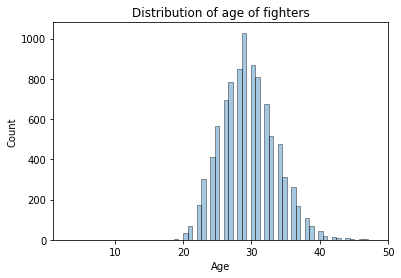

In [23]:
age_allplayers = pd.concat([ufc_fight.R_age,ufc_fight.B_age])


fig, ax = plt.subplots()
sns.distplot(age_allplayers, hist_kws=dict(edgecolor ='black',lw=1),kde=False, rug=False);
ax.set_xlim(1,50)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Distribution of age of fighters")

plt.show()

Majority of the fighters lie in the age range of 25-35, especially close to 30 years.

#### 2. Distribution of Height of all the fighters

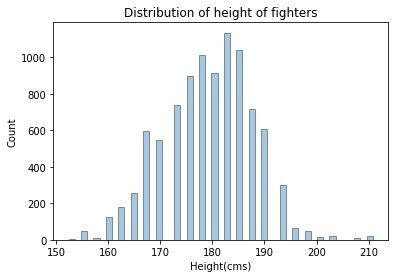

In [24]:
height_allplayers = pd.concat([ufc_fight.R_Height_cms,ufc_fight.B_Height_cms])

fig, ax = plt.subplots()
sns.distplot(height_allplayers, hist_kws=dict(edgecolor ='black',lw=1),kde=False, rug=False);
plt.xlabel("Height(cms)")
plt.ylabel("Count")
plt.title("Distribution of height of fighters")

plt.show()

Most of the fighters have an height range of 175-190cm, which is an ideal height for a heighter to have ground and head attack advantage.

#### 3. Distribution of weight of all the fighters

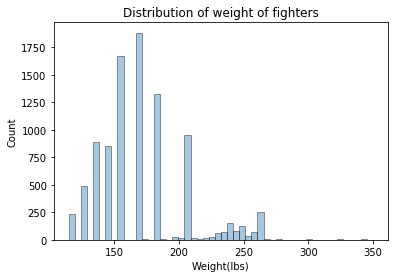

In [25]:
height_allplayers = pd.concat([ufc_fight.R_Weight_lbs,ufc_fight.B_Weight_lbs])

fig, ax = plt.subplots()
sns.distplot(height_allplayers, hist_kws=dict(edgecolor ='black',lw=1),kde=False, rug=False);
plt.xlabel("Weight(lbs)")
plt.ylabel("Count")
plt.title("Distribution of weight of fighters")

plt.show()

Most of the fighters weigh close to 150lbs, which gives them the advantage of speed and agility in movement. Notably close to 1000 fighters weigh around 200lbs, and some fighters weighing more than 250, which is not an outlier as there are different weight_class bouts in ufc.

#### 4. Age wise distribution of Red corner fighters who won by opponent's submission
<br>
For this, we classify the age variable into age group and find the analysis accordingly.

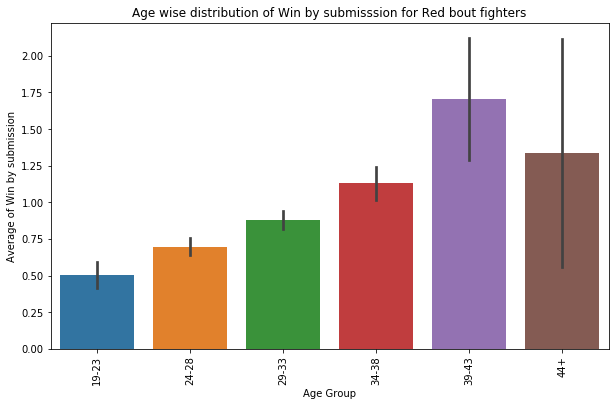

In [26]:
R_min = ufc_fight.R_age.min()
R_max = ufc_fight.R_age.max()

bins = np.arange(R_min-1,R_max+5,5)
labels = ['19-23','24-28','29-33','34-38','39-43','44+']

R_agegroup = pd.cut(ufc_fight.R_age,bins,labels=labels,include_lowest=True)

B_min = ufc_fight.B_age.min()
B_max = ufc_fight.B_age.max()

bins = np.arange(B_min-1,B_max+5,5)
labels = ['18-22','23-27','28-32','33-37','38-42','43-47','48+']

B_agegroup = pd.cut(ufc_fight.B_age,bins,labels=labels,include_lowest=True)

plt.figure(figsize=(10,6))
rounds = sns.barplot(R_agegroup,ufc_fight.R_win_by_Submission,estimator = np.mean)
plt.xlabel('Age Group')
plt.ylabel('Average of Win by submission')
plt.title('Age wise distribution of Win by submisssion for Red bout fighters')
plt.xticks(rotation=90)
rounds

The win by submission keeps on increasing as the age increases and this can be said because higher the age of the 
fighter the more matches the fighter might have fought in his/her career and this increases the average win by submission.But the fighter who are above 43 years old, the average decreases.

#### 5. Age wise distribution of win by submission for Blue corner fighters

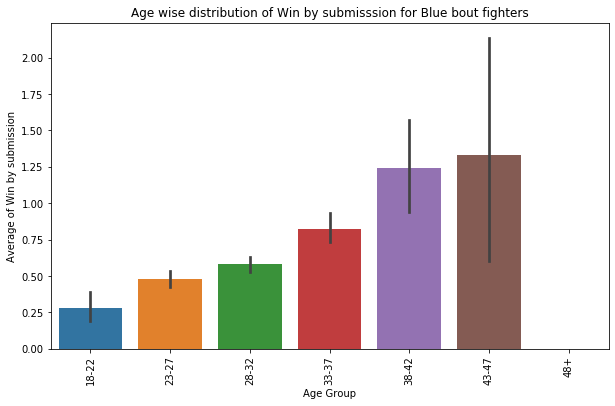

In [27]:
plt.figure(figsize=(10,6))
rounds = sns.barplot(B_agegroup,ufc_fight.B_win_by_Submission,estimator = np.mean)
plt.xlabel('Age Group')
plt.ylabel('Average of Win by submission')
plt.title('Age wise distribution of Win by submisssion for Blue bout fighters')
plt.xticks(rotation=90)
rounds

Just like for the Red corner fighters, the win by submission increases with the age. However there is no average for fighter who are above 47 years. This can be because of either of two reasons - the fighter never won by submission, the probability for which seems unlikely, and the fighter just started career at the age of 47+yrs.

#### 6. Relationship between the height of the fighter in Blue corner and their respective average head strike landed.

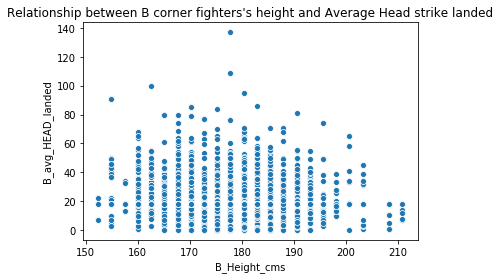

In [28]:
p = sns.scatterplot(ufc_fight.B_Height_cms,ufc_fight.B_avg_HEAD_landed)
plt.title("Relationship between B corner fighters's height and Average Head strike landed")
p

Higher the height of the fighter, the more strike can be landed on the opponent. However this graph suggest something else. Height has no relationship on the average head strike landed. Fighters in the height range of 170-190cm are able to produce better average than fighters who's height are more than 200cm.

#### 7. Does stance affects the R corner's fighter reach for different gender?

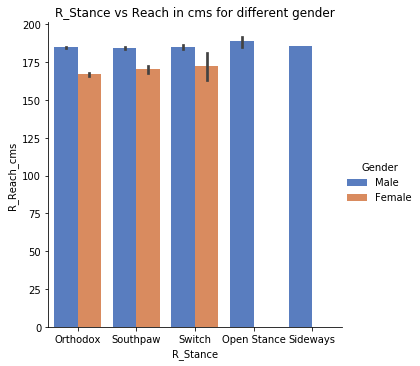

In [29]:
Gender = []
for ind,row in ufc_fight.iterrows():
    if "Women" in row['weight_class']:
        Gender.append("Female")
    else:
        Gender.append("Male")

ufc_fight['Gender'] = Gender

g = sns.catplot(x="R_Stance", y= "R_Reach_cms", hue="Gender",data = ufc_fight,
                 kind="bar", palette="muted")
plt.title("R_Stance vs Reach in cms for different gender")
g

This graph clearly portrays that stance has no affect on the reach(arm reach) of the fighter. For Male, for all the stance the reach is roughly the same, around 175cm. And for female, the average reach is round 165-170cm and this is roughly the same for all the stance. Also one more thing which is noticable is that Female fighters do not use open stance and sideways.

#### 8. Relationship between height of the fighters (B corner) and average ground strike landed for different gender

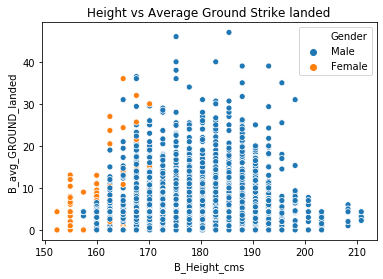

In [30]:
p = sns.scatterplot(x="B_Height_cms", y="B_avg_GROUND_landed", data=ufc_fight,hue="Gender")
plt.title("Height vs Average Ground Strike landed")
p

There are few points which are clearly noticable. First is, height of female fighters are generally lower than the male fighters. The other point of, for female, fighters who are bit taller, around 165-170cm have higher average ground strike landed and for male fighters, fighters who are tall like above 190cm have a very less average strike landed. For male, fighters who are in the range of 170-190cm have the highest average strike landed.

#### 9. Does weight really affects the average take down by the opponents on the fighter (B corner)?

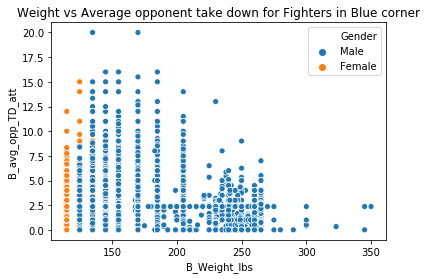

In [31]:
p = sns.scatterplot(x="B_Weight_lbs", y="B_avg_opp_TD_att", data=ufc_fight,hue="Gender")
plt.title("Weight vs Average opponent take down for Fighters in Blue corner")
p

The weight of the female fighters are generally lower than the male counterpart and there seems no relationship between average opponent take down and the weight of the female fighters. However same cannot be said for Male fighters. Fighters who weigh less 200lbs have a high average of opponents take down. And this is logically true, as the weight increases it becomes difficult for the fighter to be taken down by the opponent.

## Feature Engineering <a name="Feature"/>

Feature Engineering is one of the most important step in preparing prediction model for a problem.<br>
In this step, we can introduce meaningful features to the dataset and make the model performance better. This is because, more the data is passed to the model, the better it can predict the target, as it gets more information on which it gets trained. But we have to be careful to not introduce feature which doesn't make sense and doesn't make impact on the target feature. To handle this, we can use Chi-square test of independence to determine whether the new variable is having an impact on the target feature.<br>
For Chi-square test of independence:<br>
<center>Null Hypothesis H0 : There is no dependency or relationship between the two variable<br>
Alternative Hypothesis H1: There is dependency or relationship between the two variable</center>

For this dataset we will try to introduce 4 new features.<br>
1. Underdog - This feature signifies which fighter comes to the bout as an underdog. This impacts the performance of the fighter as the fighter is on a lose streak for more than 2 bouts and he might be going through rough patch and also the fighter might not be in the right frame of mind for the bout. This feature takes three levels: Red,Blue,No one<br>
2. Upset - This feature signifies the performance of a fighter who comes to the bout as an underdog. If the fighter is an underdog for the bout and still he wins the bout, that means he is creating an upset on the opponent and this might help in prediction in the future on the possibility of a fighter, though he was on a losing streak for more than 2 bout, can still win in the upcoming bout. This feature takes three values - Red,Blue,No one.
3. Gender - This feature is one of the important one, as UFC matches are not mix gender fight. It happens only when the 2 fighters are of same gender and this feature is derived from the weight_class. This feature takes two values - Male and Female.
4. Chokes_in_title_bout - This feature will help in understanding the possibility of a fighter, who is on a winning streak coming to the title match, but still ends up on the losing side. This opens up the theory that winning streak can impact the fighter performance as they might be overly confident about the bout. This takes three value - Red,Blue,No one.

In [32]:
#Adding underdog feature
R_streak = np.where(ufc_fight['R_current_lose_streak'] > 2, 'True','False')
B_streak = np.where(ufc_fight['B_current_lose_streak'] > 2,'True','False')

i = 0
underdog = []
for i in range(len(R_streak)):
    if (R_streak[i] == 'True') and (B_streak[i] == 'False'):
        underdog.append('Red')
    elif (R_streak[i] == 'False') and (B_streak[i] == 'True'):
        underdog.append('Blue')
    else:
        underdog.append('No one')

ufc_fight['underdog'] = underdog

In [33]:
#Adding upset feature
upset = []
chokes = []

for ind,row in ufc_fight.iterrows():
    if row['underdog'] == 'Red' and row['Winner'] == 'Red':
        upset.append('Red')
    elif row['underdog'] == 'Blue' and row['Winner'] == 'Blue':
        upset.append('Blue')
    else:
        upset.append('No one')
    if (row['title_bout'] == 'True') and (row['R_current_win_streak'] > 0) and (row['Winner'] == 'Blue'):
        chokes.append('Red')
    elif (row['title_bout'] == 'True') and (row['B_current_win_streak'] > 0) and (row['Winner'] == 'Red'):
        chokes.append('Blue')
    else:
        chokes.append('No one')

ufc_fight['upset'] = upset
ufc_fight['chokes_in_title_bout'] = chokes

Once the features are added, we will perform the Chi-square test of independence whether the new features has any dependency with the target feature. If the chi-square test's p-value is < 0.05, then we can reject the null hypothesis and accept the alternative hypothesis i.e. there is dependency between the variable and target feature.

In [34]:
columns = ['underdog','upset','Gender','chokes_in_title_bout']

for col in columns:
    print(col)
    crosstab = pd.crosstab(ufc_fight[col],ufc_fight['Winner'])
    stat,p,dof,expected = stats.chi2_contingency(crosstab)
    print("p-value: ",round(p,3))
    print("************")

underdog
p-value:  0.005
************
upset
p-value:  0.0
************
Gender
p-value:  0.001
************
chokes_in_title_bout
p-value:  0.0
************


All the new variable created has relationship between them and the target variable. Using this output, we can include the variable in the dataset.

## Final Data Preparation <a name="DataPrep"/>

### Removing Unwanted Feature

For this dataset, providing the model with fighters name, referee's name, location of bout, date of bout is not of any use, as it doesn't provide any insight in predicting who the winner of the bout is going to be.

In [35]:
ufc_fight_new = ufc_fight.iloc[:,5:]

print(ufc_fight.shape)

ufc_fight_new.head()

(4649, 149)


,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_BODY_att,B_avg_BODY_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_KD,B_avg_LEG_att,B_avg_LEG_landed,B_avg_PASS,B_avg_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_att,B_avg_TD_landed,B_avg_TD_pct,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_longest_win_streak,B_losses,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_opp_KD,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_opp_PASS,B_avg_opp_REV,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_opp_SIG_STR_pct,B_avg_opp_SUB_ATT,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_opp_TD_pct,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_total_rounds_fought,B_total_time_fought(seconds),B_total_title_bouts,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_wins,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_current_lose_streak,R_current_win_streak,R_draw,R_avg_BODY_att,R_avg_BODY_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_KD,R_avg_LEG_att,R_avg_LEG_landed,R_avg_PASS,R_avg_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_SIG_STR_pct,R_avg_SUB_ATT,R_avg_TD_att,R_avg_TD_landed,R_avg_TD_pct,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_longest_win_streak,R_losses,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_opp_KD,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_opp_PASS,R_avg_opp_REV,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_opp_SIG_STR_pct,R_avg_opp_SUB_ATT,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_opp_TD_pct,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_total_rounds_fought,R_total_time_fought(seconds),R_total_title_bouts,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,Gender,underdog,upset,chokes_in_title_bout
0,Red,True,Bantamweight,5,0,4,0,9.200,6.000,0.200,0.000,62.600,20.600,2.600,2.000,48.600,11.200,0.800,7.600,5.400,0.400,0.000,65.400,22.600,0.466,0.400,0.800,0.200,0.100,66.400,23.600,4,1,6.400,4.000,1.000,0.600,51.200,17.400,0.600,0.200,39.600,9.400,0.200,6.800,4.800,0.000,0.000,52.800,18.200,0.236,0.000,1.000,0.400,0.100,53.800,19.200,9,419.400,0,0,1,0,2,1,0,4,Orthodox,167.640,170.180,135.000,0,4,0,21.900,16.400,17.000,11.000,75.000,26.500,9.400,6.500,74.200,23.900,0.400,5.300,3.700,1.200,0.000,101.400,44.000,0.466,0.100,5.300,1.900,0.458,129.900,69.100,4,2,13.300,8.800,7.500,5.100,90.500,26.800,0.800,0.300,76.100,17.300,0.100,9.400,6.100,0.000,0.000,98.800,32.200,0.336,0.000,0.900,0.100,0.050,110.500,43.300,27,742.600,3,0,2,4,2,0,0,8,Orthodox,162.560,162.560,135.000,31.000,32.000,Male,No one,No one,Blue
1,Red,True,Women's Flyweight,5,0,3,0,14.600,9.100,11.800,7.300,124.700,42.100,2.400,1.900,112.000,32.000,0.000,12.300,10.200,0.800,0.000,138.900,51.300,0.399,0.700,1.000,0.500,0.225,158.700,69.600,3,6,13.000,9.300,12.800,9.600,101.700,32.000,8.100,6.900,97.700,30.800,0.100,11.900,8.400,1.400,0.000,122.600,48.500,0.408,0.700,2.300,0.900,0.231,151.500,75.400,29,849.000,0,0,2,1,0,0,1,4,Orthodox,167.640,167.640,125.000,0,2,0,12.000,7.714,9.286,6.857,88.143,36.143,18.429,16.429,84.571,37.000,0.000,19.286,14.714,1.714,0.143,115.857,59.429,0.576,0.429,5.143,2.429,0.601,161.571,102.857,2,2,24.571,14.1

### Encoding categorical Feature and Scaling Numerical Feature

In [36]:
ufc_fight_data = ufc_fight_new.iloc[:,1:]
ufc_fight_target = pd.DataFrame(ufc_fight_new.iloc[:,0])

for col in ufc_fight_data.select_dtypes(object):
    if (len(ufc_fight_data[col].unique()) == 2):
        ufc_fight_data[col] = pd.get_dummies(ufc_fight_data[col], drop_first=True)

ufc_fight_data = pd.get_dummies(ufc_fight_data)

column_name = ufc_fight_data.columns

print(ufc_fight_data.shape)

(4649, 170)


Once the encoding of categorical variables are done, the total number of features are 170. It's time for scaling the numerical variables. This step is done in order to bring the range of all the features in one particular range, else if features are of different range, then that particular feature will bias the final prediction.

In [37]:
ufc_fight_data = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(ufc_fight_data))

ufc_fight_data.columns = column_name

ufc_fight_data.head()

,title_bout,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_BODY_att,B_avg_BODY_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_KD,B_avg_LEG_att,B_avg_LEG_landed,B_avg_PASS,B_avg_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_att,B_avg_TD_landed,B_avg_TD_pct,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_longest_win_streak,B_losses,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_opp_KD,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_opp_PASS,B_avg_opp_REV,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_opp_SIG_STR_pct,B_avg_opp_SUB_ATT,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_opp_TD_pct,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_total_rounds_fought,B_total_time_fought(seconds),B_total_title_bouts,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_wins,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_current_lose_streak,R_current_win_streak,R_draw,R_avg_BODY_att,R_avg_BODY_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_KD,R_avg_LEG_att,R_avg_LEG_landed,R_avg_PASS,R_avg_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_SIG_STR_pct,R_avg_SUB_ATT,R_avg_TD_att,R_avg_TD_landed,R_avg_TD_pct,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_longest_win_streak,R_losses,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_opp_KD,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_opp_PASS,R_avg_opp_REV,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_opp_SIG_STR_pct,R_avg_opp_SUB_ATT,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_opp_TD_pct,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_total_rounds_fought,R_total_time_fought(seconds),R_total_title_bouts,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,Gender,weight_class_Bantamweight,weight_class_Catch Weight,weight_class_Featherweight,weight_class_Flyweight,weight_class_Heavyweight,weight_class_Light Heavyweight,weight_class_Lightweight,weight_class_Middleweight,weight_class_Open Weight,weight_class_Welterweight,weight_class_Women's Bantamweight,weight_class_Women's Featherweight,weight_class_Women's Flyweight,weight_class_Women's Strawweight,B_Stance_Open Stance,B_Stance_Orthodox,B_Stance_Sideways,B_Stance_Southpaw,B_Stance_Switch,R_Stance_Open Stance,R_Stance_Orthodox,R_Stance_Sideways,R_Stance_Southpaw,R_Stance_Switch,underdog_Blue,underdog_No one,underdog_Red,upset_Blue,upset_No one,upset_Red,chokes_in_title_bout_Blue,chokes_in_title_bout_No one,chokes_in_title_bout_Red
0,1.000,1.000,0.000,0.333,0.000,0.188,0.154,0.002,0.000,0.231,0.158,0.030,0.043,0.175,0.082,0.160,0.125,0.115,0.027,0.000,0.219,0.147,0.466,0.050,0.042,0.020,0.100,0.184,0.103,0.250,0.077,0.105,0.083,0.010,0.007,0.142,0.116,0.006,0.002,0.118,0.075,0.067,0.119,0.096,0.000,0.000,0.132,0.090,0.236,0.000,0.050,0.036,0.100,0.133,0.083,0.120,0.276,0.000,0.000,0.200,0.000,0.182,0.091,0.000,0.174,0.261,0.292,0.085,0.000,0.250,0.000,0.429,0.421,0.207,0.212,0.261,0.202,0.098,0.105,0.281,0.201,0.100,0.084,0.084,0.086,0.000,0.340,0.312,0.466,0.011,0.177,0.173,0.458,0.399,0.341,0.250,0.143,0.177,0.215,0.091,0.100,0.206,0.186,0.008,0.006,0.190,0.131,0.033,0.149,0.149,0.000,0.000,0.218,0.213,0.336,0.000,0.041,0.009,0.050,0.240,0.214,0.338,0.493,0.188,0.000,0.400,0.4

### Mapping the target feature

In this step, each level of feature is assigned a integer value. The order of level is decided by the earlier report of value counts of target feature. In the output, Red had the highest number of observation, followed by blue, and then the draw. Keeping that in mind, the integer values are assigned.

In [38]:
level_mapping = {'Red':1,'Blue':0}

ufc_fight_target['Winner'] = ufc_fight_target['Winner'].replace(level_mapping)

ufc_fight_target.head()

,Winner
0,1
1,1
2,1
3,0
4,0


### Split the dataset into train and test

For splitting, we will use the test size of 0.3, which mean we will divide the dataset into 70% training set and 30% test set.

In [39]:
U_train,U_test,t_train,t_test = train_test_split(ufc_fight_data,ufc_fight_target,
                                                 test_size=0.3,random_state=999,stratify=ufc_fight_target)

print(U_train.shape)
print(U_test.shape)
print(t_train.shape)
print(t_test.shape)

(3254, 170)
(1395, 170)
(3254, 1)
(1395, 1)


## Model Building <a name="Model"/>

* For Model Building, we will use the method of Grid Search and K Cross validation.<br>
* Sklearn provides a method called GridSearchCV. The advantage of using Grid Search is that it builds multiple model of a particular classifier on differnt parameters for that particular classifier. This process is called as Hyperparameter Tuning. Hyperparameter tuning trains the data on n number of model with different parameter and helps to identify the model with best parameter.<br>
* K Cross validation is a process of partitioning the dataset into chunks of K fold, where one chunk is used for testing and rest of the chunk is used as train dataset. This process is iterated for K times. This helps to make the model overcome the problem of over-fitting and under-fitting.<br>
* Also, instead of using simple K-fold cross validation, we will use stratified k-fold. This technique helps to preserve the proportion of each levels of target feature in the split dataset. This helps to overcome bias and variance in the model.
* Once the GridSearchCv is built, we will fit the GridSearchCV with the train dataset. Here, the point to be noted that, since the train dataset is fairly large enough, more than 3000 observations, using the cross validation on train dataset won't be much of a problem.

First we will define the cross validation parameters using the StratifiedKFold method

In [40]:
cv_method = StratifiedKFold(n_splits=5,
                            random_state=999)

### KNN Classifier

For KNN Classifier, the different parameters on which tuning can be done are n_neighbours and p. Here n_neighbours define number of nearest neighbour for a particular instance to be considered and p value defines the distance metric to be used.<br><br>
For n_neighbours, we will define a range of value from 3 to 6 neighbours and for p, we will define 1(Euclidean Distance measure) and 2(Manhattan Distance measure)
#### Building gridsearchcv and fitting the train dataset.

In [41]:
params_KNN = {'n_neighbors': [3, 4, 5, 6],'p': [1, 2]}
gs_KNN = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=params_KNN,cv=cv_method,verbose=1,scoring='accuracy',
                      n_jobs=3)
gs_KNN.fit(U_train, t_train);

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  40 out of  40 | elapsed:   31.0s finished


#### Best Parameters chosen by the GridSearchCV

In [42]:
print("Best Params: ",gs_KNN.best_params_)
print("Accuracy Score: ", round(gs_KNN.score(U_test,t_test),3))

Best Params:  {'n_neighbors': 5, 'p': 1}
Accuracy Score:  0.649


GridSearchCV choses n_neighbours as 4 and uses the manhattan distance metric to give the best accuracy of 65% on the test dataset.

#### Checking confusion matrix, Precision,Recall and F1-score

This gives a more clear picture on the level wise prediction made by the model. Classification report gives us an idea on Precision (correct predictions out of all positive prediction) and recall(Positive level correctly identified by the model), F1-Score.

In [43]:
t_pred = gs_KNN.predict(U_test)
print("Confusion Matrix")
print(metrics.confusion_matrix(t_test,t_pred))
print("")
print("Precision: ", round(metrics.precision_score(t_test,t_pred),3))
print("Recall: ", round(metrics.recall_score(t_test,t_pred),3))
print("F1-Score: ", round(metrics.f1_score(t_test,t_pred),3))

Confusion Matrix
[[147 302]
 [187 759]]

Precision:  0.715
Recall:  0.802
F1-Score:  0.756


KNN Classifier is able to identify and predict the postive levels 80% of the times and out of all positive predictions, the model correctly classifies positive level 71.5%. F1-Score of the model is 0.756.

#### AUC Score

AUC(Area under curve) score gives a probability that a positive instance is positioned to the right of negative instance.

In [44]:
t_prob = gs_KNN.predict_proba(U_test)
fpr, tpr, _ = metrics.roc_curve(t_test, t_prob[:, 1])
roc_auc1 = metrics.auc(fpr, tpr)
round(roc_auc1,3)

0.629

AUC Score for KNN Classifier is 0.62.

In [45]:
df = pd.DataFrame({'fpr': fpr, 'tpr': tpr})
base = alt.Chart(df,title='ROC Curve of KNN').properties(width=300)

roc_curve = base.mark_line(point=True).encode(alt.X('fpr', title='False Positive Rate (FPR)',  sort=None),
    alt.Y('tpr', title='True Positive Rate (TPR) (a.k.a Recall)'),
)

roc_rule = base.mark_line(color='green').encode(x='fpr',y='fpr',size=alt.value(2)
)
(roc_curve + roc_rule).interactive()

alt.LayerChart(...)

### Decision Tree

For Decision Tree Classifier, the tuning can be done on parameters like criterion, max_depth, min_samples etc. However for this problem,we will stick with two criterions
* Max Depth (depth of the tree) - which takes values from 2 to 7.
* Criterion(Information on which the split will be decided) - has 2 values, 'Gini','Entropy'

#### Building GridSearchCV and fitting the model with train data

In [46]:
params_DT = {'criterion': ['gini', 'entropy'],'max_depth': [2, 3, 4,5,6,7]}
gs_DT = GridSearchCV(estimator=DecisionTreeClassifier(random_state=999),param_grid=params_DT,cv=cv_method,verbose=1, 
                     scoring='accuracy',n_jobs=3)
gs_DT.fit(U_train, t_train);

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    4.5s
[Parallel(n_jobs=3)]: Done  60 out of  60 | elapsed:    7.0s finished


In [47]:
print("Best Params: ",gs_DT.best_params_)
print("Score: ",round(gs_DT.score(U_test,t_test),3))

Best Params:  {'criterion': 'entropy', 'max_depth': 5}
Score:  0.681


For Decision Tree Classifier, GridSearchCV chooses entropy as the criterion for the split and max depth of the tree to be 5. Accuracy of the model is far better than the accuracy of KNN Classifier.
#### Checking confusion matrix, precision, recall and F1-score

In [48]:
t_pred1 = gs_DT.predict(U_test)
print(confusion_matrix(t_test,t_pred1))
print("")
print("Precision: ", round(metrics.precision_score(t_test,t_pred1),3))
print("Recall: ", round(metrics.recall_score(t_test,t_pred1),3))
print("F1-Score: ", round(metrics.f1_score(t_test,t_pred1),3))

[[ 15 434]
 [ 11 935]]

Precision:  0.683
Recall:  0.988
F1-Score:  0.808


All the values of Precision,Recall and F1-Score are better than the KNN Classifier. Having a F1-Score of 0.80 indicates the model is able to classify positive level very well. However one thing also needs to be taken in account is the True Negative rate which is 15/449, which indicates the model is not able to predict the negative level,'Blue' winner. But there is imbalance in the negative level which justifies this.
#### AUC Score

In [49]:
t_prob = gs_DT.predict_proba(U_test)
fpr, tpr, _ = metrics.roc_curve(t_test, t_prob[:, 1])
roc_auc2 = metrics.auc(fpr, tpr)
round(roc_auc2,3)

0.65

AUC Score of 0.65 is same as KNN Classifier.

In [50]:
df = pd.DataFrame({'fpr': fpr, 'tpr': tpr})
base = alt.Chart(df,title='ROC Curve of KNN').properties(width=300)

roc_curve = base.mark_line(point=True).encode(alt.X('fpr', title='False Positive Rate (FPR)',  sort=None),
    alt.Y('tpr', title='True Positive Rate (TPR) (a.k.a Recall)'),
)

roc_rule = base.mark_line(color='green').encode(x='fpr',y='fpr',size=alt.value(2)
)
(roc_curve + roc_rule).interactive()

alt.LayerChart(...)

### Random Forest
For Random Forest Classifier, three parameters on which the tuning can be done are:
* n_estimators(number of decision tree to be built) - the values are 100,200,500
* criterion - 'gini','entropy'
* max_depth - values from 3 to 6

#### Building GridSearchCV and fitting the model with train data

In [51]:
params_RF = {'n_estimators':[100,200,500],'criterion':['gini','entropy'],'max_depth':[3,4,5,6]}

gs_RF = GridSearchCV(estimator=RandomForestClassifier(random_state=999), param_grid=params_RF, cv=cv_method,verbose=1, 
                     scoring='accuracy',n_jobs=3)

gs_RF.fit(U_train, t_train);

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:  1.1min
[Parallel(n_jobs=3)]: Done 120 out of 120 | elapsed:  3.7min finished


In [52]:
print("Best Params: ",gs_RF.best_params_)
print("Score: ",round(gs_RF.score(U_test,t_test),3))

Best Params:  {'criterion': 'gini', 'max_depth': 6, 'n_estimators': 200}
Score:  0.691


The model accuracy is 69% and the gridsearchcv uses entropy criterion with a tree max depth of 6 and uses 100 decision tree to predict and classify.
#### Checking confusion matrix, precision, recall and F1-score

In [53]:
t_pred2 = gs_RF.predict(U_test)
print(confusion_matrix(t_test,t_pred2))
print("")
print("Precision: ", round(metrics.precision_score(t_test,t_pred2),3))
print("Recall: ", round(metrics.recall_score(t_test,t_pred2),3))
print("F1-Score: ", round(metrics.f1_score(t_test,t_pred2),3))

[[ 28 421]
 [ 10 936]]

Precision:  0.69
Recall:  0.989
F1-Score:  0.813


The values of Precision, Recall and F1 Score are almost the same as Decision tree but it is slightly better. Again due to target feature imbalance, the true negative rate is very less. 
#### AUC Score

In [54]:
t_prob = gs_RF.predict_proba(U_test)
fpr, tpr, _ = metrics.roc_curve(t_test, t_prob[:, 1])
roc_auc3 = metrics.auc(fpr, tpr)
round(roc_auc3,3)

0.684

AUC Score is 0.69 which is better than the above two classifier.

In [55]:
df = pd.DataFrame({'fpr': fpr, 'tpr': tpr})
base = alt.Chart(df,title='ROC Curve of KNN').properties(width=300)

roc_curve = base.mark_line(point=True).encode(alt.X('fpr', title='False Positive Rate (FPR)',  sort=None),
    alt.Y('tpr', title='True Positive Rate (TPR) (a.k.a Recall)'),
)

roc_rule = base.mark_line(color='green').encode(x='fpr',y='fpr',size=alt.value(2)
)
(roc_curve + roc_rule).interactive()

alt.LayerChart(...)

### Logistic Regression
There can be many parameter tuning for Logistic Regression, however we will stick with only two parameter tuning:
* Penalty (the inverse of reguralization strength) - Two values L1 and L2.
* C(Norm used in penalization)

#### Building GridSearchCV and fitting the model with train data

In [56]:
params_LR = {'penalty':['l1','l2'],'C':np.logspace(0, 4, 10)}

clf = GridSearchCV(estimator=LogisticRegression(random_state=999),param_grid=params_LR,cv=cv_method,verbose=1,
                   scoring='accuracy',n_jobs=3)

clf.fit(U_train, t_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  82 tasks      | elapsed:    4.9s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    6.0s finished


In [57]:
print("Best Params: ",clf.best_params_)
print("Score: ",round(clf.score(U_test,t_test),3))

Best Params:  {'C': 2.7825594022071245, 'penalty': 'l2'}
Score:  0.728


The accuracy of 0.728 is by far the best amongst the four model. This indicates that the accurate binary classification by the model is 72.8%.
#### Checking confusion matrix, precision, recall and F1-score

In [58]:
t_pred3 = clf.predict(U_test)
print(confusion_matrix(t_test,t_pred3))
print("")
print("Precision: ", round(metrics.precision_score(t_test,t_pred3),3))
print("Recall: ", round(metrics.recall_score(t_test,t_pred3),3))
print("F1-Score: ", round(metrics.f1_score(t_test,t_pred3),3))

[[156 293]
 [ 87 859]]

Precision:  0.746
Recall:  0.908
F1-Score:  0.819


F1-Score is pretty much similar to what we got for other three models.
#### AUC Score

In [59]:
t_prob = clf.predict_proba(U_test)
fpr, tpr, _ = metrics.roc_curve(t_test, t_prob[:, 1])
roc_auc4 = metrics.auc(fpr, tpr)
round(roc_auc4,3)

0.769

AUC Score of 0.77 indicates that model is very well able to classify the positive class level from the negative one.

In [60]:
df = pd.DataFrame({'fpr': fpr, 'tpr': tpr})
base = alt.Chart(df, title='ROC Curve of KNN').properties(width=300)

roc_curve = base.mark_line(point=True).encode(alt.X('fpr', title='False Positive Rate (FPR)',  sort=None),
    alt.Y('tpr', title='True Positive Rate (TPR) (a.k.a Recall)'),
)

roc_rule = base.mark_line(color='green').encode(x='fpr',y='fpr',size=alt.value(2)
)
(roc_curve + roc_rule).interactive()

alt.LayerChart(...)

Again AUC Score is also the best amongst the four model.
#### Statistical Significance between the different models

In [61]:
cv_results_RF = cross_val_score(estimator=gs_RF.best_estimator_,X=U_test,y=t_test,cv=cv_method,scoring='roc_auc')
cv_results_DT = cross_val_score(estimator=gs_DT.best_estimator_,X=U_test,y=t_test, cv=cv_method, scoring='roc_auc')
cv_results_KNN = cross_val_score(estimator=gs_KNN.best_estimator_,X=U_test,y=t_test, cv=cv_method, scoring='roc_auc')
cv_results_LR = cross_val_score(estimator=clf.best_estimator_,X=U_test,y=t_test, cv=cv_method, scoring='roc_auc')

# Logistic Regression seems to be the best, so let's compare that to the others
# any p-value < 0.05 indicates a statistically significant result

print(stats.ttest_rel(cv_results_LR, cv_results_KNN))
print(stats.ttest_rel(cv_results_LR, cv_results_DT))
print(stats.ttest_rel(cv_results_LR, cv_results_RF))

Ttest_relResult(statistic=13.126395999791352, pvalue=0.0001945135158616067)
Ttest_relResult(statistic=5.1364381168253, pvalue=0.006808057847787208)
Ttest_relResult(statistic=9.304463326335382, pvalue=0.00074243992019178)


Results shows that there is a significant difference in the performance of other models in comparison with the Logistic regression. But we need to perform the Feature Selection on the logistic model to see whether taking smaller number of features increases/decreases the accuracy.

### Feature Selection for Logistic Regression Model
For feature selection, we will use pipeline on the logistic regression model. Pipeline is all about trying out n number of features on hyper parameter tuning and checking for which n number of feature, the model gives the best score. For this project we will try for 50,100 and total number of feature in actual dataset i.e 170.

In [62]:
class RFIFeatureSelector(BaseEstimator, TransformerMixin):
    
    def __init__(self, n_features_=50):
        self.n_features_ = n_features_
        self.fs_indices_ = None

    # override the fit function
    def fit(self, X, y):
        from sklearn.ensemble import RandomForestClassifier
        from numpy import argsort
        model_rfi = RandomForestClassifier(n_estimators=100)
        model_rfi.fit(X, y)
        self.fs_indices_ = argsort(model_rfi.feature_importances_)[::-1][0:self.n_features_] 
        return self 
    
    # override the transform function
    def transform(self, X, y=None):
        return X.iloc[:, self.fs_indices_]

In [63]:
pipe_LR = Pipeline(steps=[('rfi_fs', RFIFeatureSelector()), ('lr', LogisticRegression())])

params_pipe_LR = {'rfi_fs__n_features_': [50, 100, ufc_fight_data.shape[1]],'lr__penalty': ['l1','l2'],
                  'lr__C': np.logspace(0, 4, 10)}

gs_pipe_LR = GridSearchCV(estimator=pipe_LR,param_grid=params_pipe_LR,cv=cv_method,refit=True,n_jobs=-2,
                           scoring='roc_auc',verbose=1) 

gs_pipe_LR.fit(U_train, t_train);

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:   38.0s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:  4.2min finished


In [64]:
print("Best params: ",gs_pipe_LR.best_params_)

Best params:  {'lr__C': 2.7825594022071245, 'lr__penalty': 'l2', 'rfi_fs__n_features_': 170}


Trying out the pipeline with three different parameters for number of features of dataset to be considered for training the model, the best parameter for number of features turns out to be 170, which is the full dataset size. This shows that all the features turns out to be important in target prediction and giving some importance in the whole process.<br>
Also, 170 features means that the four newly created variable using feature engineering technique turns out to be important as well.

## Limitation<a name="Limit"/>
* The first and most important limitations of the approach is imbalance in the target feature. There are lot of observations for 'Red' level than the 'Blue' level. Even though we have used Stratified K fold, the learning of the model for the blue levels will be limited and this in turn affects the model prediction and gives accuracy of correctly predicting blue level very less in comparison to red level. <br>
* Secondly, for this project StratifiedKFold Cross validation is used to reduce the computation time. Because of this, the effeciency of model couldn't checked to the full. This can be extended to RepeatedStratifiedKFold.<br>
* Third limitation is that hyper parameters tuning is done on very limited set of parameters. Again this is done to reduce the computational time and power. This hyper parameter tuning can be extended to more parameters to see how the model is predicting for test data.
* Critques:
    - The approach taken can be extended to applying more algorithms like Ada Boost and Neural Network.
    - Also, using 170 features for the training the model is too much. This can be reduced using PCA.

## Summary <a name="Summary"/>

#### Building Summary Table

In [65]:
results = pd.DataFrame(columns=["Model","Accuracy","F1-Score","AUC Score"])
results['Model'] = ['KNN','Decision Tree','Random Forest','Logistic Regression']
results['Accuracy'] = [gs_KNN.score(U_test,t_test),gs_DT.score(U_test,t_test),
                       gs_RF.score(U_test,t_test),clf.score(U_test,t_test)]
results['F1-Score'] = [metrics.f1_score(t_test,t_pred),metrics.f1_score(t_test,t_pred1),
                       metrics.f1_score(t_test,t_pred2),metrics.f1_score(t_test,t_pred3)]
results['AUC Score'] = [roc_auc1,roc_auc2,roc_auc3,roc_auc4]

In [66]:
results

,Model,Accuracy,F1-Score,AUC Score
0,KNN,0.649,0.756,0.629
1,Decision Tree,0.681,0.808,0.650
2,Random Forest,0.691,0.813,0.684
3,Logistic Regression,0.728,0.819,0.769


This project was about analysing the ufc matches that happened from 1993 till 2019. There were some key insights which were found like heavier the fighter is, the average opponent takedown reduces, Height of a fighter has no impact on the head strike landed on the opponents. Also, new features were introduced for the model, which had significant relationship with the target feature and those feature were Gender, Underdog,Upsets,Chokes in title bout. For model prediction, several steps like cross validation and hyper parameter tuning were done to make sure that the model chosen gives an effective prediction and underfitting and overfitting doesn't happen in the model.
<br>
Initially model was trained on all the 170 features and then feature selection using Random Forest Importance(RFI) was performed. It was found that model was giving better performance when all the 170 features were considered. This might be because of importance of all the feature in predicting the target level.
<br>
The above results table show the four model trained on the dataset and their evaluation on the test data. Looking at the table, Logistic Regression provides the best score for all the three measures, Accuracy - Percentage of accurate predictions for all the target levels, F1-Score - Harmonic mean of precision and recall and AUC Score. AUC Score is one of the important score in selecting the logistic regresssion, as this score is insensitive to class imbalance and a high score indicates a significantly high percentage of TNR.

## Data Reference<a name="Reference"/>
UFC-Fight historical data from 1993-2019 - https://www.kaggle.com/rajeevw/ufcdata